In [27]:
#Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [28]:
#Load Data to a Dtaframe
df = pd.read_csv(r'C:\Users\garvi\OneDrive\Documents\Durham college\SEMESTER_2\DATA 2204 STATISTICAL PRED MODELLING\WEEK 12\ChannelDataset.csv')
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
0,12669,9656,7561,214,2674,1338,3,2
1,7057,9810,9568,1762,3293,1776,3,2
2,6353,8808,7684,2405,3516,7844,3,2
3,13265,1196,4221,6404,507,1788,3,1
4,22615,5410,7198,3915,1777,5185,3,2


In [29]:
#Exploratory Data Analysis
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region,Channel
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,2.543182,1.322727
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.774272,0.468052
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,1.000000,1.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,2.000000,1.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,3.000000,1.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,3.000000,2.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,3.000000,2.000000


In [30]:
#Tukey Method

# Import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(df.drop('Channel',axis=1),0,list(df.drop('Channel',axis=1)))
df.drop('Channel',axis=1).loc[Outliers_to_drop]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region
29,43088,2100,2609,1200,1107,823,3
39,56159,555,902,10002,212,2916,3
47,44466,54259,55571,7782,24171,6465,3
52,40721,3916,5876,532,2587,1278,3
87,43265,5025,8117,6312,1579,14351,3
...,...,...,...,...,...,...,...
202,25203,11487,9490,5065,284,6854,1
218,18,7504,15205,1285,4797,6372,1
372,3884,3801,1641,876,397,4829,3
409,8708,3634,6100,2349,2123,5137,3


In [31]:
#Create New Dataset without Outliers
good_data=df.drop(df.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             332 non-null    int64
 1   Milk              332 non-null    int64
 2   Grocery           332 non-null    int64
 3   Frozen            332 non-null    int64
 4   Detergents_Paper  332 non-null    int64
 5   Delicassen        332 non-null    int64
 6   Region            332 non-null    int64
 7   Channel           332 non-null    int64
dtypes: int64(8)
memory usage: 20.9 KB


In [32]:
#Create Profile Report
    
#Importing package
import pandas_profiling as pp
from IPython.display import IFrame
 
# Profile Report
ChannelDataset = pp.ProfileReport(df)
ChannelDataset.to_file('ChannelDatasetW12.html')
display(IFrame('ChannelDatasetW12.html', width=900, height=350))

In [13]:
#Define x and y variable
x = good_data.drop('Channel',axis=1).to_numpy()
y = good_data['Channel'].to_numpy()

# Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,stratify=y,random_state=100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)


x_2 = sc.transform(x)

#Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [14]:
#Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
clf = LogisticRegression(solver='lbfgs',class_weight='balanced',random_state=100)
clf.fit(x_train2,y_train)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_names = good_data.drop('Channel',axis=1).columns[feature_idx]
print('\nKey Features:',feature_names)


Key Features: Index(['Milk', 'Grocery', 'Detergents_Paper'], dtype='object')


In [15]:
#Create x and y variables
x2 = good_data[feature_names].to_numpy()
Y2 = good_data['Channel'].to_numpy()

#Create Train and Test Datasets (New Dataset)
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,Y2,test_size = 0.2,stratify=Y2,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train2,y_train2)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train3 = sc.fit_transform(x_train_smt)
x_test3 = sc.transform(x_test2)




In [16]:
#Class Balance - Test Data
print('Train Data - Class Split')
num_ones = (y_train_smt == 1).sum()
num_twos = (y_train_smt == 2).sum()
print('Class 1 -',  num_ones)
print('Class 2 -',  num_twos)

Train Data - Class Split
Class 1 - 189
Class 2 - 189


In [17]:
#Construct some pipelines for LogisticRegression and Random Forest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',class_weight='balanced',
                                               random_state=100))])
pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])

pipeline.insert(0,pipe_logreg)
pipeline.insert(1,pipe_rdf)


#Set grid search params 

modelpara =[]

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(0,param_gridlogreg)

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(1,param_gridrdf)


In [18]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train3, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test3)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['Outcome 1','Outcome 2']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [19]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            cv=10,
                                                            train_sizes=np.linspace(.1,1,10),
                                                            scoring='accuracy',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation accuracy')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim(S)
    plt.show()

Logistic Regression - Learning Curve


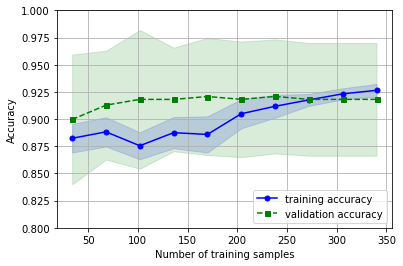


Random Forest - Learning Curve


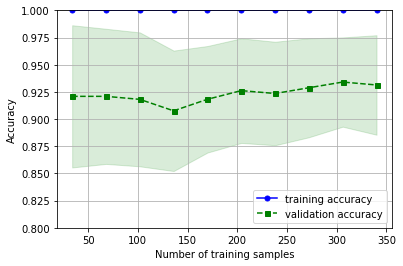

In [21]:
#Plot Learning Curve
print('Logistic Regression - Learning Curve')
plot_learning_curves(pipe_logreg)
print('\nRandom Forest - Learning Curve')
plot_learning_curves(pipe_rdf)


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100)

Best Parameters: {'clf__C': 100, 'clf__penalty': 'l2'}

 [[43  5]
 [ 2 17]]

               precision    recall  f1-score   support

   Outcome 1       0.96      0.90      0.92        48
   Outcome 2       0.77      0.89      0.83        19

    accuracy                           0.90        67
   macro avg       0.86      0.90      0.88        67
weighted avg       0.90      0.90      0.90        67

ROC Curve


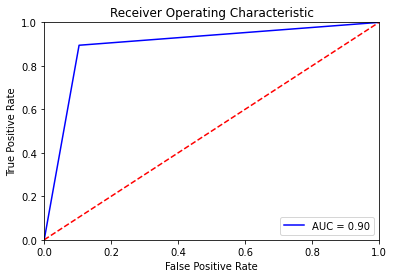


Optimized Model

Model Name: RandomForestClassifier(random_state=100)

Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'auto', 'clf__n_estimators': 100}

 [[43  5]
 [ 2 17]]

               precision    recall  f1-score   support

   Outcome 1       0.96      0.90      0.92        48
   Outcome 2       0.77      0.89      0.83        19

    accuracy                           0.90        67
   macro avg       0.86      0.90      0.88        67
weighted avg       0.90      0.90      0.90        67

ROC Curve


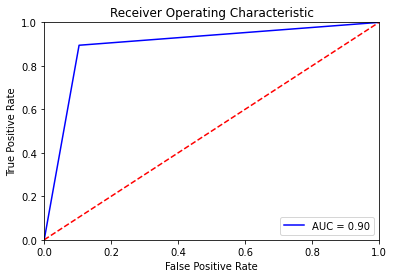

In [22]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

In [23]:
#Prepare Models 
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score

In [24]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]

models.append(('Random Forest',RandomForestClassifier(n_estimators=100,
                                                      random_state=100)))
models.append(('GBC',GradientBoostingClassifier(random_state=100)))

In [25]:
#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n')


Model Evaluation - Recall Score
Random Forest 0.91 +/- 0.04
GBC 0.91 +/- 0.05




In [26]:
#Create Voting Model - Sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
estimators = []
model1 = RandomForestClassifier(n_estimators=100,random_state=100)
estimators.append(('Random Forest', model1))

model2 = GradientBoostingClassifier(random_state=100)
estimators.append(('GBC', model2))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')
for clf in (model1,model2,voting_clf):
    rkfcv= clf.fit(x_train_smt,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, y, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))   


Voting Model
RandomForestClassifier 0.9
GradientBoostingClassifier 0.89
VotingClassifier 0.9
